In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

C:\Users\andre\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
ticker='PETR4.SA'
dados = pd.DataFrame()

dados['PETR4.SA']=wb.DataReader(ticker,data_source='yahoo',start='2007-1-1')['Adj Close']


In [3]:
dados

,PETR4.SA
Date,
2007-01-02,18.904060
2007-01-03,18.329277
2007-01-04,17.919788
2007-01-05,17.375055
2007-01-08,17.577923
...,...
2020-06-15,20.700001
2020-06-16,21.370001
2020-06-17,21.440001


In [7]:
log_returns = np.log(1+ dados.pct_change())
log_returns.tail()

,PETR4.SA
Date,
2020-06-15,0.004843
2020-06-16,0.031854
2020-06-17,0.003270
2020-06-18,0.007435
2020-06-19,-0.006037


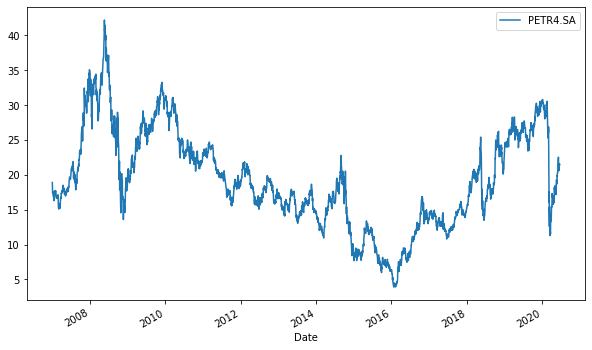

In [8]:
dados.plot(figsize=(10,6))

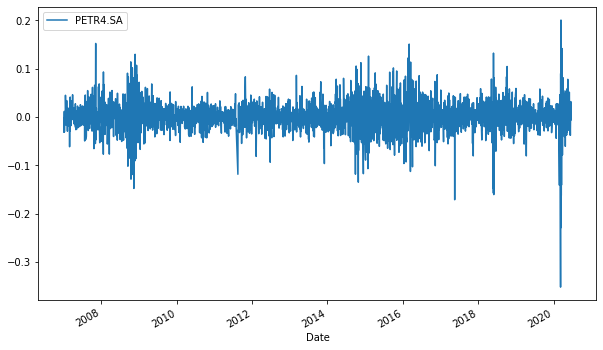

In [9]:
log_returns.plot(figsize=(10,6))

In [10]:
u = log_returns.mean()
var = log_returns.var()
u,var

(PETR4.SA    0.000039
 dtype: float64,
 PETR4.SA    0.000915
 dtype: float64)

In [13]:
drift = u - (0.5*var)
drift

PETR4.SA   -0.000419
dtype: float64

In [16]:
stdev = log_returns.std()
stdev

PETR4.SA    0.030248
dtype: float64

In [17]:
np.array(drift)

array([-0.00041882])

In [21]:
stdev.values

array([0.03024788])

In [79]:
dias = 126
vezes = 1000
daily_returns = np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(dias,vezes)))

In [80]:
daily_returns

array([[1.00732473, 0.9700474 , 0.99682901, ..., 0.99267099, 0.99072203,
        0.9232152 ],
       [0.97047416, 0.95073779, 1.08403764, ..., 0.92026824, 1.06801797,
        0.99815036],
       [0.99291471, 1.02024306, 1.02453194, ..., 0.96902732, 0.97286225,
        0.98267583],
       ...,
       [0.9890576 , 0.95064652, 0.99076139, ..., 0.96582499, 1.00385251,
        1.01206737],
       [1.03117925, 1.04051962, 0.94003244, ..., 0.99555742, 1.00790474,
        1.02418854],
       [1.03570655, 0.96355473, 0.97615856, ..., 0.96012722, 0.99481077,
        1.03284656]])

In [81]:
s0 = dados.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = s0

In [82]:
for t in range(1,dias):
    price_list[t] = price_list[t-1] * daily_returns[t]

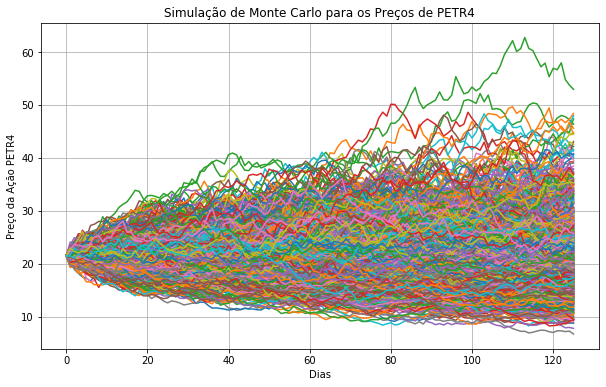

In [83]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dias')
plt.ylabel('Preço da Ação PETR4')
plt.title('Simulação de Monte Carlo para os Preços de PETR4')
plt.plot(price_list);


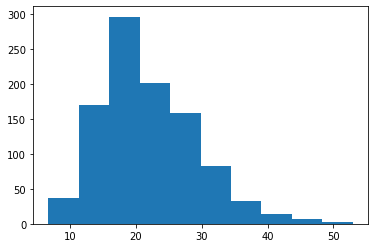

In [92]:
plt.hist(price_list[-1],bins=10);

In [90]:
media_simulacoes = price_list[-1].mean()
print('O preço médio das simulações no final do ano é de R$'+str(round(media_simulacoes,2)))

O preço médio das simulações no final do ano é de R$21.85
